In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-jobs/DataAnalyst.csv


In [2]:
df = pd.read_csv('/kaggle/input/data-analyst-jobs/DataAnalyst.csv')

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [4]:
df.shape

(2253, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

### Clean the data

In [6]:
# remove the unnamed:0 column in the dataset

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
# Missing data

df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

One company name is missing out of 2254 entries

In [8]:
df['Job Title'].value_counts()

Data Analyst                                                   405
Senior Data Analyst                                             90
Junior Data Analyst                                             30
Business Data Analyst                                           28
Sr. Data Analyst                                                21
                                                              ... 
Data Analyst, Center on Immigration and Justice (CIJ)            1
Marketing Data Analyst, Teleflora                                1
Analyst, Data (Pharmacy & SQL)                                   1
Financial Controller / Data Analyst / Spreadsheet Superstar      1
Data Science Analyst, Capital Markets                            1
Name: Job Title, Length: 1272, dtype: int64

In [9]:
df['Salary Estimate'].value_counts()

$41K-$78K (Glassdoor est.)    57
$42K-$76K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$36K-$67K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$47K-$81K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
-1                             1
Name: Salary Estimate, Length: 90, dtype: int64

In [10]:
df['Rating'].value_counts()

-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
 3.8    130
 4.0    129
 3.5    125
 4.1    119
 3.3    109
 3.4    101
 3.2     91
 3.1     68
 3.0     57
 4.3     55
 4.2     47
 4.5     47
 4.6     46
 4.4     46
 2.8     43
 2.9     40
 2.5     32
 4.8     29
 2.7     25
 4.7     23
 4.9     17
 2.6     14
 2.4     10
 1.0     10
 2.3      9
 2.0      6
 2.1      4
 2.2      3
 1.6      2
 1.8      2
 1.9      2
 1.7      2
Name: Rating, dtype: int64

In [11]:
df['Founded'].value_counts()

-1       660
 2008     80
 1996     54
 2000     54
 2002     54
        ... 
 1924      1
 1922      1
 1918      1
 1908      1
 1682      1
Name: Founded, Length: 161, dtype: int64

In [12]:
df['Location'].value_counts()

New York, NY             310
Chicago, IL              130
San Francisco, CA        119
Austin, TX                81
Los Angeles, CA           80
                        ... 
Hercules, CA               1
Evanston, IL               1
Elk Grove Village, IL      1
Woodbridge, NJ             1
American Fork, UT          1
Name: Location, Length: 253, dtype: int64

In [13]:
df['Size'].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

In [14]:
df['Headquarters'].value_counts()

New York, NY             206
-1                       172
San Francisco, CA         71
Chicago, IL               66
Woodridge, IL             58
                        ... 
Edmond, OK                 1
West Conshohocken, PA      1
Harleysville, PA           1
Smithfield, RI             1
Durham, NC                 1
Name: Headquarters, Length: 483, dtype: int64

In [15]:
df['Type of ownership'].value_counts()

Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
School / School District             9
Private Practice / Firm              9
Self-employed                        2
Franchise                            2
Name: Type of ownership, dtype: int64

In [16]:
df['Industry'].value_counts()

-1                                     353
IT Services                            325
Staffing & Outsourcing                 323
Health Care Services & Hospitals       151
Consulting                             111
                                      ... 
Truck Rental & Leasing                   1
Catering & Food Service Contractors      1
Pet & Pet Supplies Stores                1
Hotels, Motels, & Resorts                1
Stock Exchanges                          1
Name: Industry, Length: 89, dtype: int64

In [17]:
df['Sector'].value_counts()

Information Technology                570
Business Services                     524
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Mining & Metals                   

In [18]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In [19]:
df['Competitors'].value_counts()

-1                                                                          1732
Robert Half, Insight Global                                                   14
Adecco, Manpower                                                              14
TEKsystems, Insight Global, Accenture                                         10
Artech Information Systems, Mindlance, Tech Mahindra                          10
                                                                            ... 
DHL Global Forwarding, Freight, DB Schenker, Panalpina                         1
Northeast Utilities                                                            1
Penn Medicine, Kimmel Cancer Center Jefferson, Abington Jefferson Health       1
Wolverine Trading, Interactive Brokers, Citadel                                1
Cerner, Epic, Athena Health Care Systems                                       1
Name: Competitors, Length: 291, dtype: int64

In [20]:
df['Easy Apply'].value_counts()

-1      2173
True      80
Name: Easy Apply, dtype: int64

##### We can observe that almost all columns contain -1 as a value which can be replaced with Nan
##### The -1 is having int, categorical(string) and float datatype and each should be done seperately

In [21]:
df = df.replace(-1,np.nan)
df = df.replace(-1.0,np.nan)
df = df.replace('-1',np.nan)

In [22]:
df.isnull().sum()

Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

##### columns easy apply and competitors have more than 50 percent data as null values

In [23]:
# we can observe from the dataset that the company name is having \n rating at the end of the name annd it can be removed

df['Company Name'],_ = df['Company Name'].str.split('\n', 1). str

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# we can observe that the column job title has both title and department in same column and they can be seperated

df['Job Title'], df['Department'] = df['Job Title'].str.split(',', 1).str

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# We can observe from the salary estimate colmn that the salary is estimated by glassdoor at the end of estimated values and this can be removed.

df['Salary Estimate'],_ = df['Salary Estimate'].str.split('(', 1).str

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department
0,Data Analyst,$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ)
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,NaN
2,Senior Data Analyst,$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,Insights & Analytics Team [Customer Operations]
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,NaN
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN


In [27]:
# In salary estimate we can observe the presence of $ and K at left and right of the value respectively and they can be removed

df['Minimum Salary Estimate'], df['Maximum Salary Estimate'] = df['Salary Estimate'].str.split('-').str

df['Minimum Salary Estimate'] = df['Minimum Salary Estimate'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

df['Maximum Salary Estimate'] = df['Maximum Salary Estimate'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,Minimum Salary Estimate,Maximum Salary Estimate
0,Data Analyst,$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ),37,66
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,NaN,37,66
2,Senior Data Analyst,$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,Insights & Analytics Team [Customer Operations],37,66
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,NaN,37,66
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66


In [29]:
# now we can drop the salary estimate column

df.drop(['Salary Estimate'], axis = 1, inplace = True)

In [30]:
# As we can see easy apply column has Nan values hey can be converted to bool False

df['Easy Apply'] = df['Easy Apply'].fillna(False).astype(bool)

In [31]:
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,Minimum Salary Estimate,Maximum Salary Estimate
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ),37,66
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,False,NaN,37,66
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,Insights & Analytics Team [Customer Operations],37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,False,NaN,37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66


In [32]:
# True in easy apply represents that the company is hiring at present
# we can now plot the company wise hiring 

df_hiring = df[df['Easy Apply'] == True]
df_company = df_hiring.groupby('Company Name').count().reset_index()
df_company = df_company.sort_values('Easy Apply', ascending = True)
df_company

,Company Name,Job Title,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,Minimum Salary Estimate,Maximum Salary Estimate
29,Moveworks,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1
30,My Job Tank,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1
31,NCSOFT,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
32,NJF Global Holdings,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1
33,National Kidney Foundation,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
34,"Numeric, LLC",1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1
35,OSI Engineering,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1
36,Omada Health,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
37,Open Systems Technologies (NYC),1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1
38,PDI Software,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1


In [33]:
# We can now visualize the jobs company wise
import matplotlib.pyplot as plt
import seaborn as sns

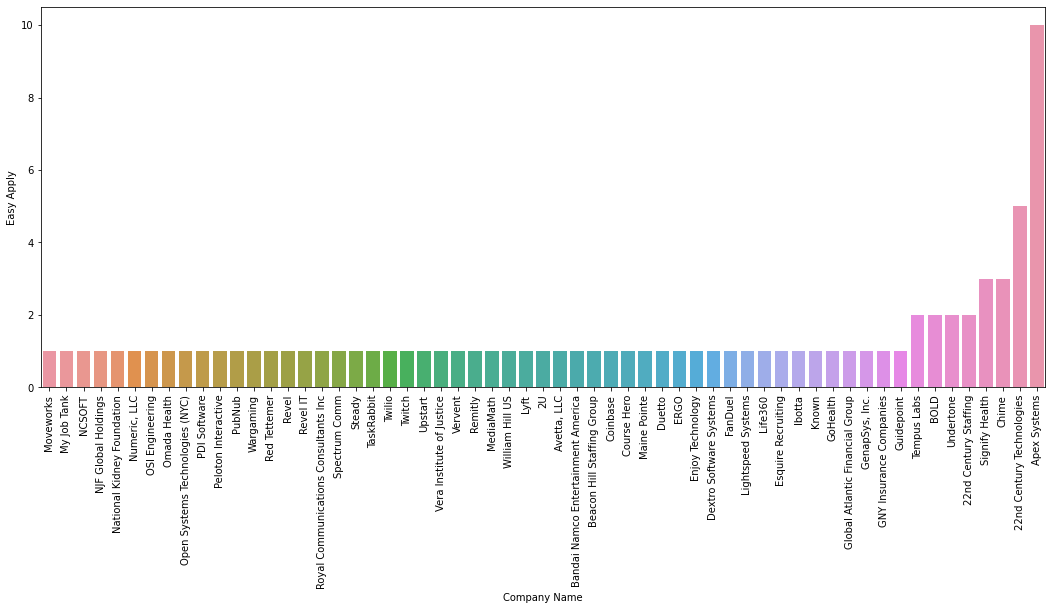

In [34]:
plt.figure(figsize = (18, 7))
sns.barplot('Company Name', 'Easy Apply', data = df_company, )
plt.xticks(rotation = 90)
plt.show()

In [35]:
# We can visulaize location wise salary trends 
df_location = df.groupby('Location')[['Minimum Salary Estimate', 'Maximum Salary Estimate']].mean().sort_values(['Maximum Salary Estimate', 'Minimum Salary Estimate'],ascending = False).head(50)
df_location

,Minimum Salary Estimate,Maximum Salary Estimate
Location,,
"Newark, CA",110.000000,190.000000
"Daly City, CA",93.000000,159.000000
"Marin City, CA",93.000000,159.000000
"Los Gatos, CA",89.333333,156.000000
"Berkeley, CA",82.000000,149.000000
"San Jose, CA",79.421053,138.289474
"Cupertino, CA",77.769231,134.000000
"Santa Clara, CA",76.181818,133.090909
"Pico Rivera, CA",113.000000,132.000000


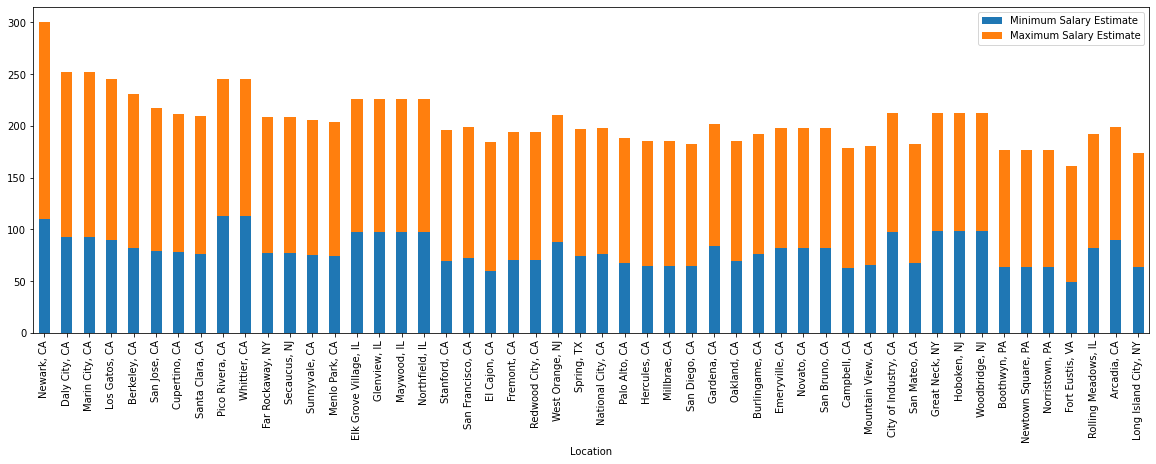

In [36]:
df_location.plot.bar(stacked = True, figsize = (20,6))
plt.show()

In [37]:
df.isnull().sum()

Job Title                     0
Job Description               0
Rating                      272
Company Name                  1
Location                      0
Headquarters                172
Size                        163
Founded                     660
Type of ownership           163
Industry                    353
Sector                      353
Revenue                     163
Competitors                1732
Easy Apply                    0
Department                 2023
Minimum Salary Estimate       0
Maximum Salary Estimate       0
dtype: int64

In [38]:
# We can replace missing values in rating with mean value
df['Rating'].fillna(df['Rating'].mean(), inplace = True)

In [39]:
df.isnull().sum()

Job Title                     0
Job Description               0
Rating                        0
Company Name                  1
Location                      0
Headquarters                172
Size                        163
Founded                     660
Type of ownership           163
Industry                    353
Sector                      353
Revenue                     163
Competitors                1732
Easy Apply                    0
Department                 2023
Minimum Salary Estimate       0
Maximum Salary Estimate       0
dtype: int64

In [40]:
df.fillna('Unknown', inplace = True)

In [41]:
df_rating = df.groupby('Rating')['Company Name'].count()
df_rating = pd.DataFrame(df_rating).rename(columns = {'Company Name': 'Count of companies'}).reset_index()
df_rating = df_rating.sort_values('Count of companies', ascending = False)
df_rating

,Rating,Count of companies
23,3.731903,272
25,3.900000,140
21,3.600000,135
22,3.700000,132
36,5.000000,131
24,3.800000,130
26,4.000000,129
20,3.500000,125
27,4.100000,119
18,3.300000,109


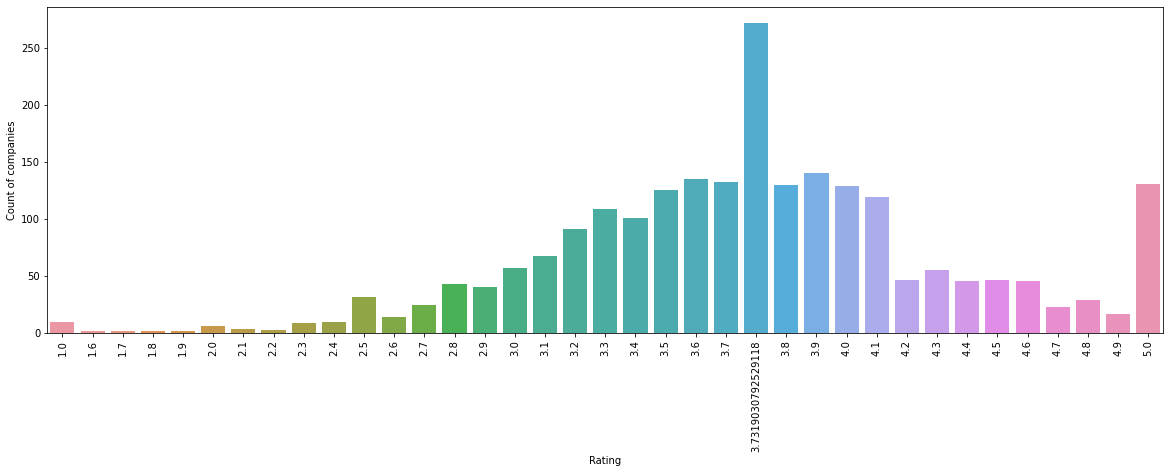

In [42]:
plt.figure(figsize = (20,6))
sns.barplot(x = df_rating['Rating'],y = df_rating['Count of companies'])
plt.xticks(rotation = 90)
plt.show()

In [43]:
# Top places where most companies headquarters are located

df_hq = df.groupby('Headquarters')['Company Name'].count()
df_hq = pd.DataFrame(df_hq).rename(columns = {'Company Name': 'Count of companies'}).reset_index()
df_hq = df_hq.sort_values('Count of companies', ascending = False).head(30)
df_hq

,Headquarters,Count of companies
291,"New York, NY",206
439,Unknown,172
373,"San Francisco, CA",71
89,"Chicago, IL",66
476,"Woodridge, IL",58
235,"Los Angeles, CA",49
194,"Houston, TX",35
29,"Austin, TX",34
339,"Princeton, NJ",30
325,"Philadelphia, PA",27


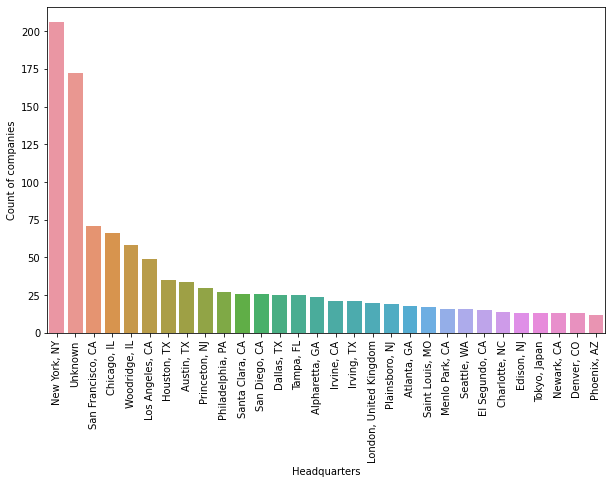

In [44]:
plt.figure(figsize = (10,6))
sns.barplot(x = df_hq['Headquarters'],y = df_hq['Count of companies'])
plt.xticks(rotation = 90)
plt.show()

In [45]:
df['Size']

0         201 to 500 employees
1             10000+ employees
2       1001 to 5000 employees
3         201 to 500 employees
4        501 to 1000 employees
                 ...          
2248       51 to 200 employees
2249          10000+ employees
2250                   Unknown
2251      201 to 500 employees
2252          10000+ employees
Name: Size, Length: 2253, dtype: object

In [46]:
df_size = df.groupby('Size')['Company Name'].count()
df_size = pd.DataFrame(df_size).rename(columns = {'Company Name': 'Count of companies'}).reset_index()
df_size = df_size.sort_values('Count of companies', ascending = False)
df_size

,Size,Count of companies
6,51 to 200 employees,421
1,10000+ employees,375
2,1001 to 5000 employees,348
0,1 to 50 employees,347
3,201 to 500 employees,249
5,501 to 1000 employees,211
7,Unknown,205
4,5001 to 10000 employees,97


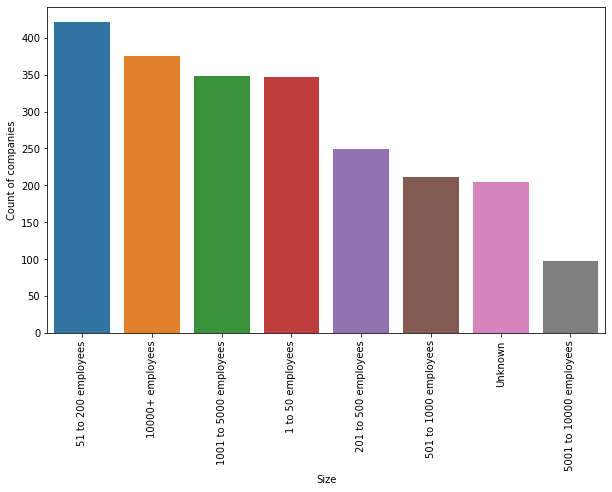

In [47]:
plt.figure(figsize = (10,6))
sns.barplot(x = df_size['Size'],y = df_size['Count of companies'])
plt.xticks(rotation = 90)
plt.show()

In [48]:
df_found = df.groupby('Founded')['Company Name'].count()
df_found = pd.DataFrame(df_found).rename(columns = {'Company Name': 'Count of companies'}).reset_index()
df_found = df_found.sort_values('Count of companies', ascending = False).head(50)
df_found

,Founded,Count of companies
160,Unknown,660
148,2008,80
140,2000,54
142,2002,54
136,1996,54
139,1999,53
138,1998,51
151,2011,47
144,2004,47
137,1997,46


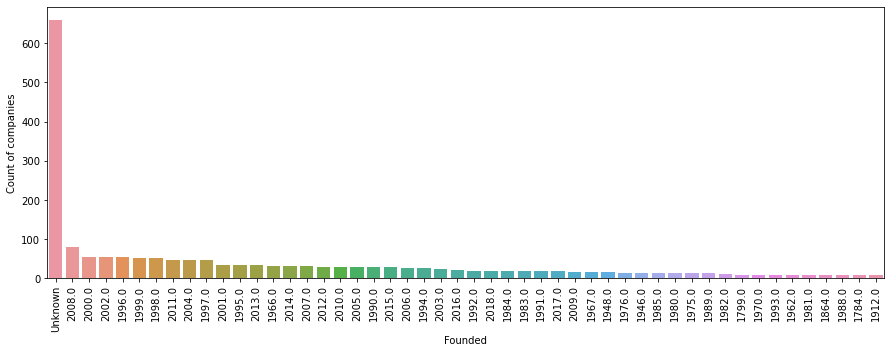

In [49]:
plt.figure(figsize = (15,5))
sns.barplot(x = df_found['Founded'],y = df_found['Count of companies'])
plt.xticks(rotation = 90)
plt.show()

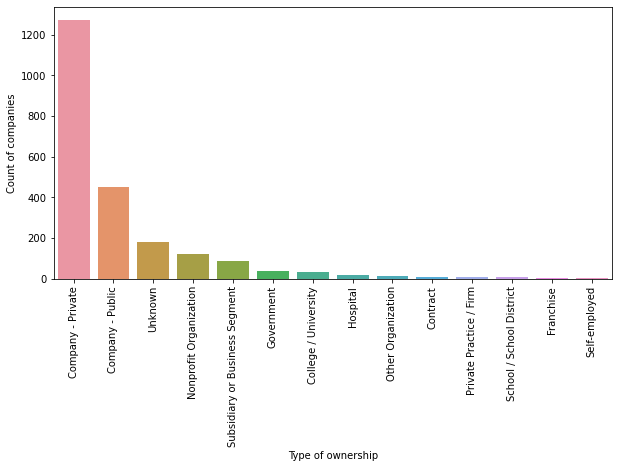

In [50]:
df_owner = df.groupby('Type of ownership')['Company Name'].count()
df_owner = pd.DataFrame(df_owner).rename(columns = {'Company Name': 'Count of companies'}).reset_index()
df_owner = df_owner.sort_values('Count of companies', ascending = False)


plt.figure(figsize = (10,5))
sns.barplot(x = df_owner['Type of ownership'],y = df_owner['Count of companies'])
plt.xticks(rotation = 90)
plt.show()

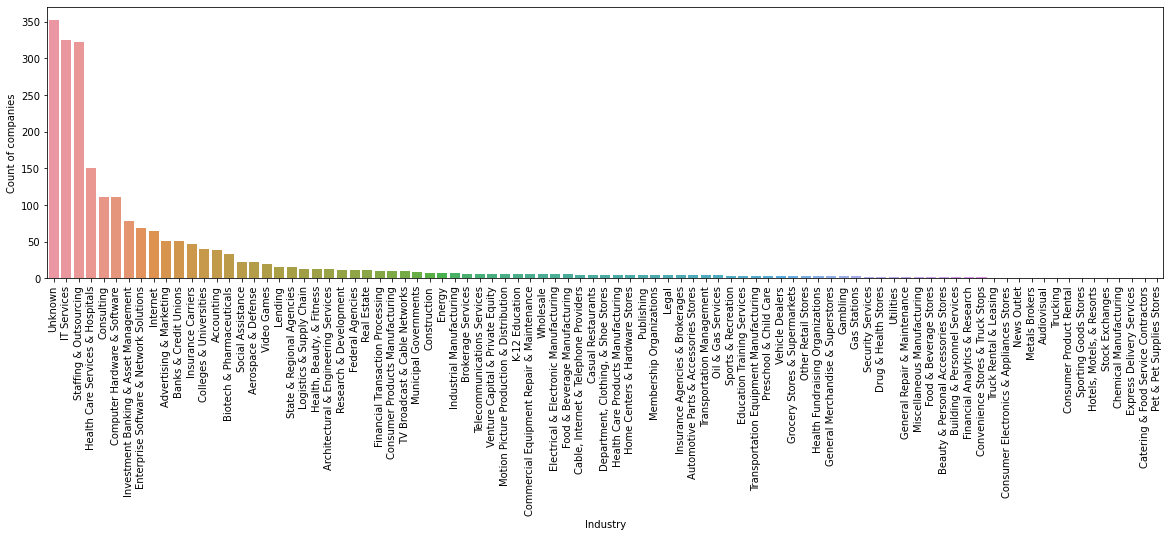

In [51]:
df_industry = df.groupby('Industry')['Company Name'].count()
df_industry = pd.DataFrame(df_industry).rename(columns = {'Company Name': 'Count of companies'}).reset_index()
df_industry = df_industry.sort_values('Count of companies', ascending = False)


plt.figure(figsize = (20,5))
sns.barplot(x = df_industry['Industry'],y = df_industry['Count of companies'])
plt.xticks(rotation = 90)
plt.show()

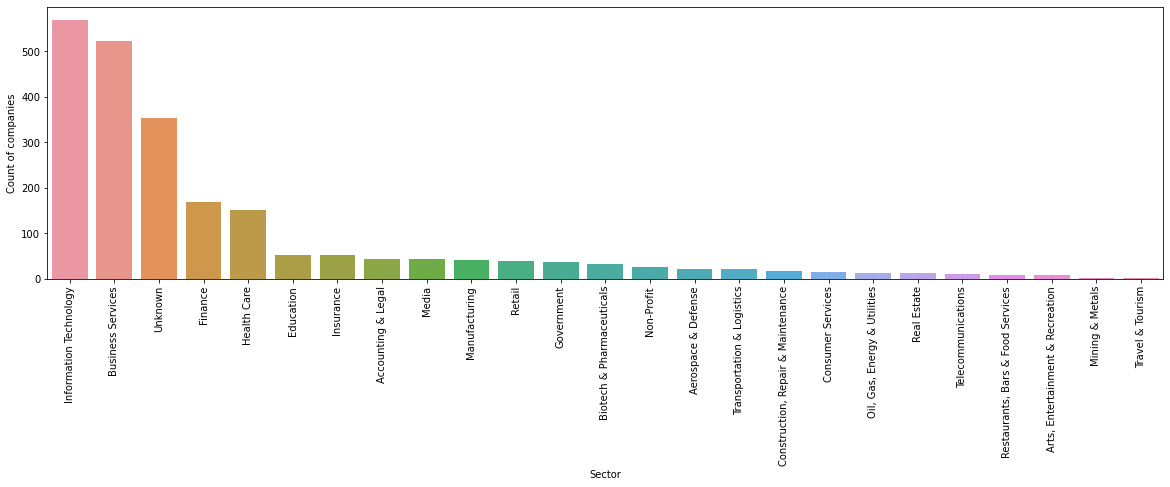

In [52]:
df_sector = df.groupby('Sector')['Company Name'].count()
df_sector = pd.DataFrame(df_sector).rename(columns = {'Company Name': 'Count of companies'}).reset_index()
df_sector = df_sector.sort_values('Count of companies', ascending = False)


plt.figure(figsize = (20,5))
sns.barplot(x = df_sector['Sector'],y = df_sector['Count of companies'])
plt.xticks(rotation = 90)
plt.show()

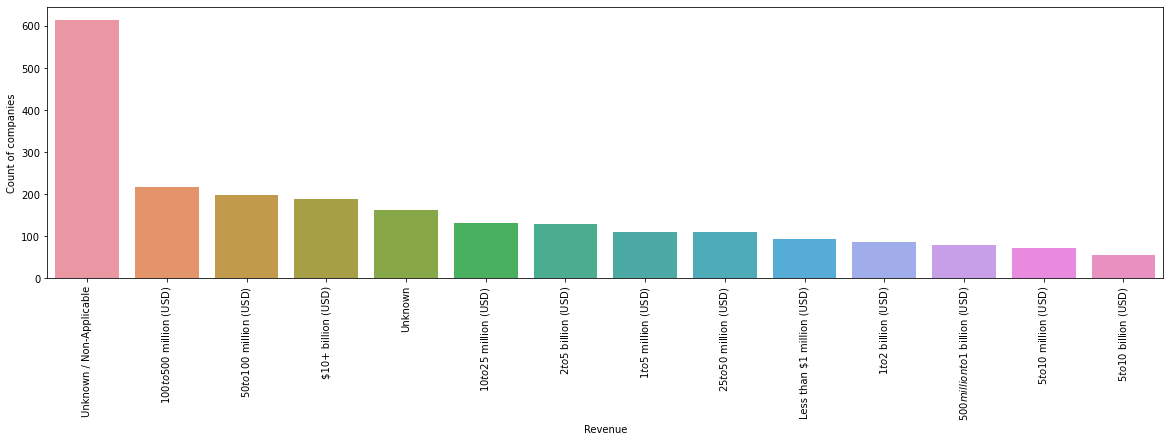

In [53]:
df_revenue = df.groupby('Revenue')['Company Name'].count()
df_revenue = pd.DataFrame(df_revenue).rename(columns = {'Company Name': 'Count of companies'}).reset_index()
df_revenue = df_revenue.sort_values('Count of companies', ascending = False)


plt.figure(figsize = (20,5))
sns.barplot(x = df_revenue['Revenue'],y = df_revenue['Count of companies'])
plt.xticks(rotation = 90)
plt.show()

In [54]:
df_ind = df.groupby('Industry')[['Minimum Salary Estimate', 'Maximum Salary Estimate']].mean().sort_values(['Maximum Salary Estimate', 'Minimum Salary Estimate'],ascending = False)
df_ind = df_ind.rename(columns = {'Minimum Salary Estimate' : 'Average Minimum Salary', 'Maximum Salary Estimate' : 'Average Maximum Salary'})
df_ind

,Average Minimum Salary,Average Maximum Salary
Industry,,
Education Training Services,69.666667,116.000000
Gambling,64.000000,112.000000
Health Care Products Manufacturing,69.200000,110.400000
Transportation Equipment Manufacturing,60.333333,109.666667
Electrical & Electronic Manufacturing,60.833333,108.500000
...,...,...
Vehicle Dealers,39.000000,60.333333
Oil & Gas Services,36.250000,56.500000
Grocery Stores & Supermarkets,28.333333,54.666667


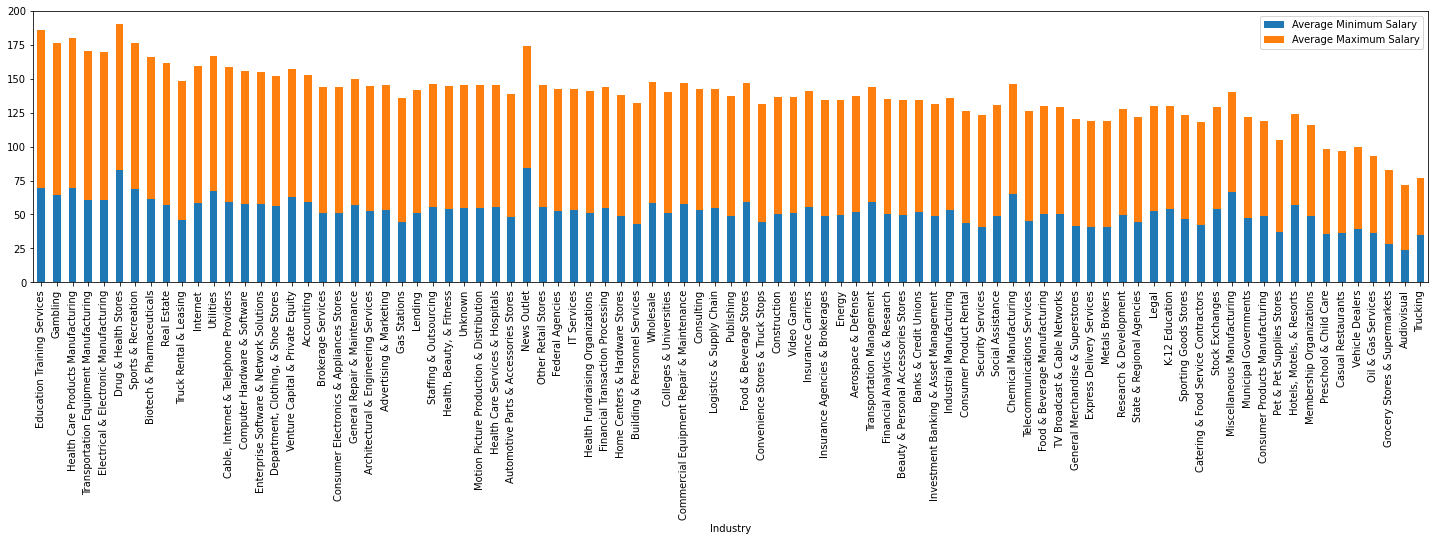

In [55]:
df_ind.plot.bar(stacked = True, figsize = (25,5))
plt.show()

In [56]:
df_open = pd.DataFrame(df[df['Easy Apply'] == True]['Job Title'].value_counts()).rename(columns={'Job Title':'Number of openings'}).reset_index().rename(columns={'index':'Job Title'})
df_open

,Job Title,Number of openings
0,Data Analyst,17
1,Senior Data Analyst,8
2,Senior Product Data Analyst,2
3,Lead Data Analyst,2
4,Senior Data Quality Analyst,2
5,Data Base Programmer/Analyst,2
6,Senior Analyst,2
7,TECHNICAL DATA ANALYST,1
8,Data Science Analyst,1
9,Business Analyst/Data Domain Expert,1


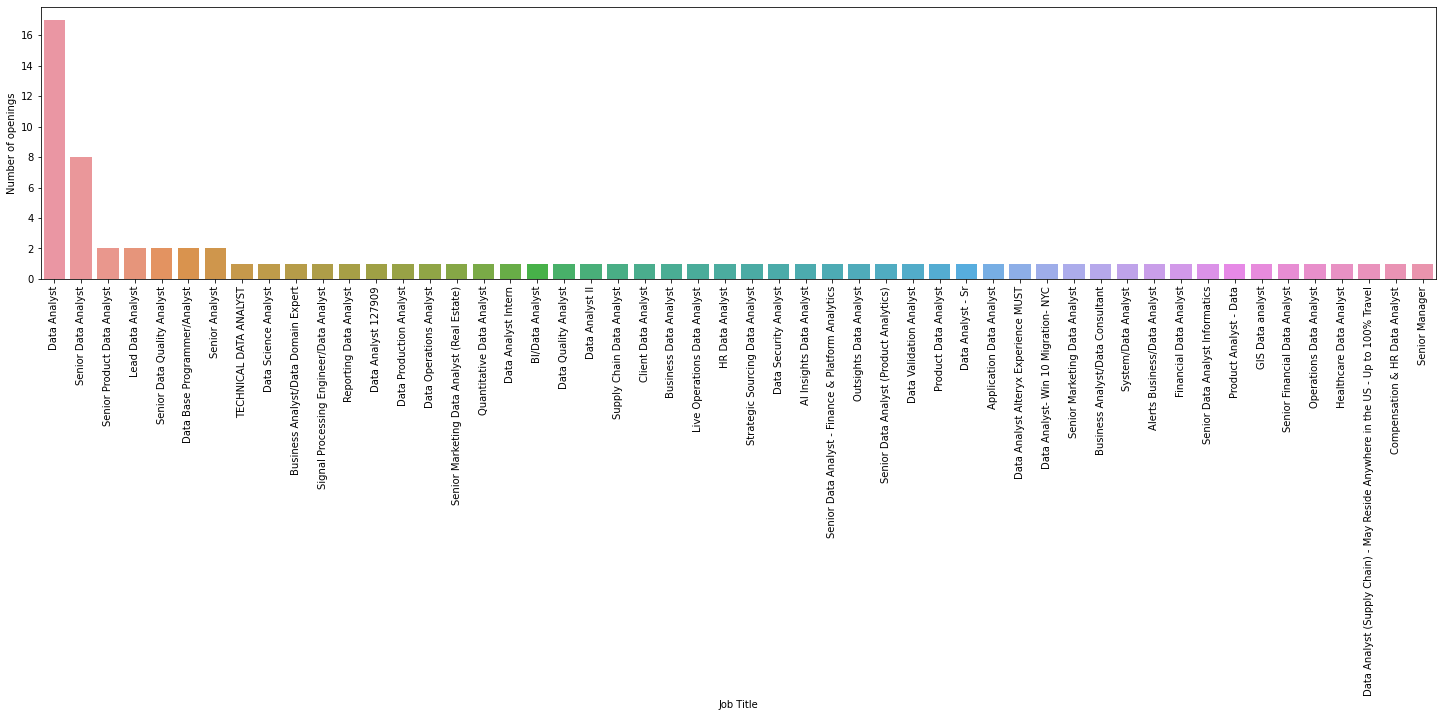

In [57]:
plt.figure(figsize = (25, 5))
sns.barplot(df_open['Job Title'], df_open['Number of openings'])
plt.xticks(rotation = 90)
plt.show()

## ***Please upvote if you like the content***